In [2]:
# Importing the necessary modules and packages
import pandas as pd
import numpy as np
from pandas import read_csv, get_dummies, Series
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # Supprt Vector Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report,ConfusionMatrixDisplay,plot_confusion_matrix
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## We will read in our already processed data from the Random Forest Evaluation


In [5]:
# Read in cleaned data from RFC modelling
X_train = pd.read_csv("CA_data\\train_features.csv")
X_test = pd.read_csv("CA_data\\test_features.csv")
Y_train = pd.read_csv("CA_data\\train_labels.csv",header=None)
Y_test = pd.read_csv("CA_data\\test_labels.csv",header=None)

# pd.set_option('display.max_columns', None)
# data.head()
# #print(data.head())
# #print(data.shape)

In [7]:
print(Y_train.value_counts())

0    3660
1    3660
dtype: int64

In [13]:
#### We need to convert the labels to the form sklearn expects it (1d array)
Y_train = Y_train.squeeze().rename('Attrition_Flag')
Y_test = Y_test.squeeze().rename('Attrition_Flag')

In [14]:
print(X_train.head())

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,...,Education_Level_Uneducated,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,2.065184,-0.954076,-1.026528,-0.906850,2.506217,-0.535370,-0.342390,1.385780,-0.138608,1.419435,...,-0.489102,-0.297459,-0.497644,2.314692,-0.447343,-0.810021,0.268705,-0.104207,-0.042033,-0.240864
1,-0.792936,1.048135,-0.255519,0.669523,-1.127972,-1.182231,3.658520,-0.416746,-0.717076,-1.444839,...,2.044562,-0.297459,-0.497644,-0.432023,-0.447343,1.234536,0.268705,-0.104207,-0.042033,-0.240864
2,0.946789,-0.954076,1.286498,0.669523,0.751781,0.758354,-0.342390,-0.416746,0.359990,-1.444839,...,2.044562,-0.297459,-0.497644,-0.432023,2.235423,-0.810021,0.268705,-0.104207,-0.042033,-0.240864
3,-1.165734,1.048135,0.515489,-0.906850,-0.626705,0.758354,0.657838,0.484517,-0.758827,-0.163876,...,-0.489102,-0.297459,2.009469,-0.432023,-0.447343,-0.810021,0.268705,-0.104207,-0.042033,-0.240864
4,0.076927,1.048135,1.286498,0.669523,-0.000121,-0.535370,-1.342617,-0.416746,-0.703085,0.405030,...,2.044562,-0.297459,-0.497644,-0.432023,-0.447343,1.234536,0.268705,-0.104207,-0.042033,-0.240864


# Support Vector Classifier (SVC)

#### Method 1: We will begin fitting a basic SVC model in its default setting

In [15]:
svc_default = SVC(random_state=100)

In [16]:
svc_default.fit(X_train,Y_train) # Training

SVC(random_state=100)

In [17]:
print(svc_default.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 100, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [18]:
default_pred = svc_default.predict(X_test) #Testing

In [19]:
print("svc_default accuracy is:", round(accuracy_score(Y_test, default_pred),4),'≈', 
      round(accuracy_score(Y_test, default_pred)*100,2),'%')
print("svc_default recall is:", round(recall_score(Y_test, default_pred),4),'≈', 
      round(recall_score(Y_test, default_pred)*100,2),'%')
print("svc_default precision is:", round(precision_score(Y_test, default_pred),4),'≈', 
      round(precision_score(Y_test, default_pred)*100,2),'%')

svc_default accuracy is: 0.8734 ≈ 87.34 %
svc_default recall is: 0.7681 ≈ 76.81 %
svc_default precision is: 0.5506 ≈ 55.06 %


In [20]:
con_matrix = confusion_matrix(Y_test,default_pred)
print (con_matrix)

[[1423  173]
 [  64  212]]


In [24]:
print("------- svc_default confusion matrix----------------")
con_matrix_default = confusion_matrix(Y_test, default_pred)
print (con_matrix_default)

------- svc_default confusion matrix----------------
[[1423  173]
 [  64  212]]


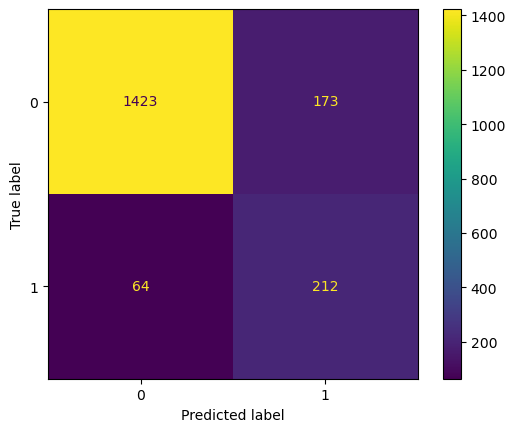

In [27]:
plot_confusion_matrix(svc_default,X_test,Y_test);

#### Method 2: Fit a SVC model with some changed parameters
kernel='linear', gamma='auto', C=10

In [29]:
svc_1 = SVC(kernel='linear',gamma='auto', C=10,random_state=101)
svc_1.fit(X_train,Y_train)

SVC(C=10, gamma='auto', kernel='linear', random_state=101)

In [30]:
pred_svc_1 = svc_1.predict(X_test) #Testing

In [31]:
print("----svc_1 with kernel='linear',gamma='auto', C=10----------------")
print("svc_1 accuracy is:", round(accuracy_score(Y_test, pred_svc_1),4),'≈', 
      round(accuracy_score(Y_test, pred_svc_1)*100,2),'%')
print("svc_1 recall is:", round(recall_score(Y_test, pred_svc_1),4),'≈', 
      round(recall_score(Y_test, pred_svc_1)*100,2),'%')
print("svc_1 precision is:", round(precision_score(Y_test, pred_svc_1),4),'≈', 
      round(precision_score(Y_test, pred_svc_1)*100,2),'%')

----svc_1 with kernel='linear',gamma='auto', C=10----------------
svc_1 accuracy is: 0.8291 ≈ 82.91 %
svc_1 recall is: 0.8225 ≈ 82.25 %
svc_1 precision is: 0.4558 ≈ 45.58 %


In [50]:
print("------- svc_1 confusion matrix----------------")
con_matrix_svc1 = confusion_matrix(Y_test, pred_svc_1)
print (con_matrix_svc1)

------- svc_1 confusion matrix----------------
[[1325  271]
 [  49  227]]


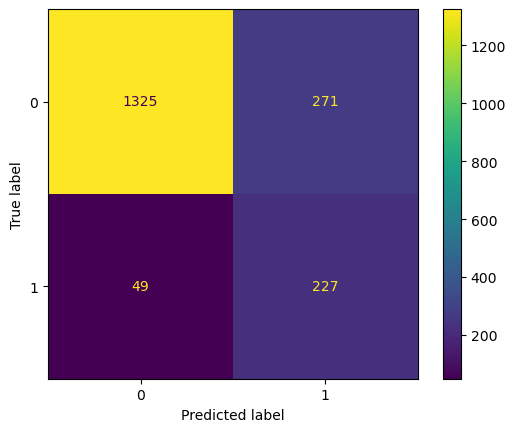

In [51]:
plot_confusion_matrix(svc_1,X_test,Y_test);

#### Method 3: Fit a SVC model using Pipeline of transforms and estimator

In [33]:
model = Pipeline([('balancing', SMOTE(random_state = 102)),('classification', SVC(random_state=10) ) ]) # bulilding classifier
kernels_c = {'classification__kernel': ['linear','poly','rbf','sigmoid'], 'classification__C': [.001,.01,.1,1,10,100]}
grid_search1 = GridSearchCV(estimator=model, param_grid=kernels_c, scoring='recall', cv=5)
grid_search1.fit(X_train, Y_train)

best_parameters_gs1 = grid_search1.best_params_
print(best_parameters_gs1)
best_result_gs1 = grid_search1.best_score_ 
print(best_result_gs1)

{'classification__C': 100, 'classification__kernel': 'rbf'}
0.990983606557377


##### Fitting with the best parameters found via the GridSearchCV


In [45]:
svc_2 = SVC(kernel='rbf', C=100, random_state=103)  # building classifier 
svc_2.fit(X_train, Y_train) # training 

SVC(C=100, random_state=103)

In [46]:
pred_svc_2 = svc_2.predict(X_test) 

In [47]:
print("svc_2 with max_features: 2 and 200 trees accuracy is:", round(accuracy_score(Y_test, pred_svc_2),4),'≈', 
      round(accuracy_score(Y_test, pred_svc_2)*100,2),'%')
print("rfc with max_features: 2 and 200 trees recall is:", round(recall_score(Y_test, pred_svc_2),4),'≈', 
      round(recall_score(Y_test, pred_svc_2)*100,2),'%')
print("rfc with max_features: 2 and 200 trees precision is:", round(precision_score(Y_test, pred_svc_2),4),'≈', 
      round(precision_score(Y_test, pred_svc_2)*100,2),'%')

rfc with max_features: 2 and 200 trees accuracy is: 0.8723 ≈ 87.23 %
rfc with max_features: 2 and 200 trees recall is: 0.5616 ≈ 56.16 %
rfc with max_features: 2 and 200 trees precision is: 0.5678 ≈ 56.78 %


In [35]:
pred_svc_2= svc_2.predict(X_test)  #testing 

In [48]:
print("----svc_2 with kernel='rbf' and C=10----------------")
print("svc_2 accuracy is:", round(accuracy_score(Y_test, pred_svc_2),4),'≈', 
      round(accuracy_score(Y_test, pred_svc_2)*100,2),'%')
print("svc_2 recall is:", round(recall_score(Y_test, pred_svc_2),4),'≈', 
      round(recall_score(Y_test, pred_svc_2)*100,2),'%')
print("svc_2 precision is:", round(precision_score(Y_test, pred_svc_2),4),'≈', 
      round(precision_score(Y_test, pred_svc_2)*100,2),'%')

----svc_2 with kernel='rbf' and C=10----------------
svc_2 accuracy is: 0.8723 ≈ 87.23 %
svc_2 recall is: 0.5616 ≈ 56.16 %
svc_2 precision is: 0.5678 ≈ 56.78 %


In [52]:
print("------- svc_2 confusion matrix----------------")
con_matrix_svc2 = confusion_matrix(Y_test, pred_svc_2)
print (con_matrix_svc2)

------- svc_2 confusion matrix----------------
[[1478  118]
 [ 121  155]]


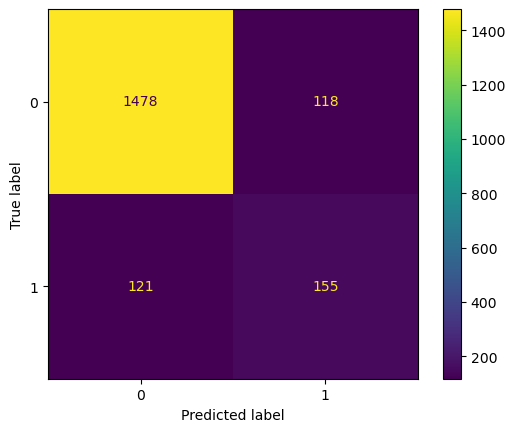

In [53]:
plot_confusion_matrix(svc_2,X_test,Y_test);

## SVC seems to be overfitting; does so well on training data and poorly on testing data in terms of recall